Cпектр оптимальной стратегии состоит из одной точки
Значение игры = 5
p = [0, 1, 0]
q = [0, 0, 1, 0]


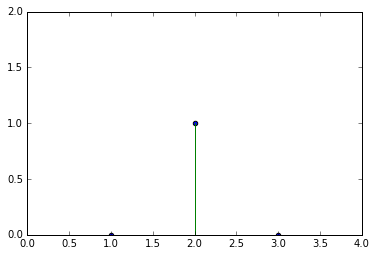

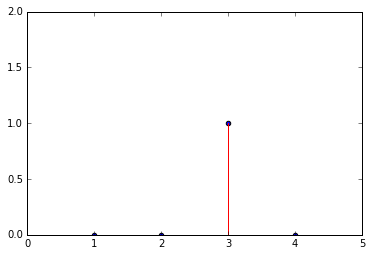

Cпектр оптимальной стратегии неполон
Значение игры = 5.4
p = [ 0.   0.8  0.2]
q = [ 0.6  0.4  0. ]


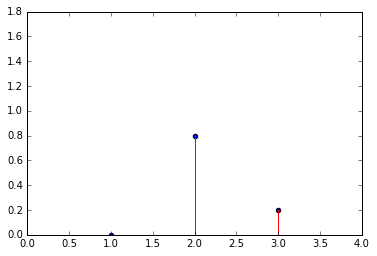

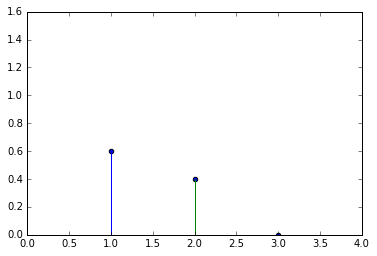

Cпектр оптимальной стратегии полон
Значение игры = 4.55555555556
p = [ 0.22222222  0.22222222  0.55555556]
q = [ 0.22222222  0.55555556  0.22222222]


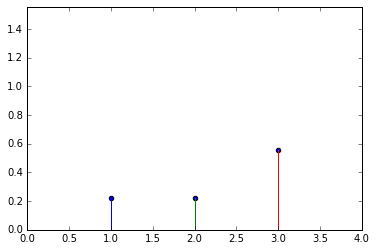

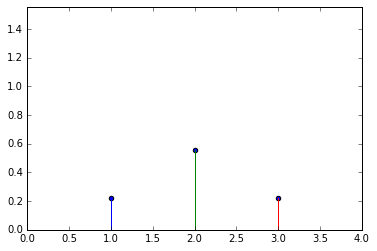

In [34]:
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt
%matplotlib inline

def nash_equilibrium(A):
    #проверка на наличие седловой точки
    maxmin = np.max(np.min(A, axis = 1))
    maxmincoord = np.where(A == maxmin)
    minmax = np.min(np.max(A, axis = 0))
    minmaxcoord = np.where(A == minmax)
    if maxmin == minmax: #решение игры в чистых стратегиях
        for i in range(len(maxmincoord[0])):
            for j in range(len(minmaxcoord[0])):
                if (maxmincoord[0][i] == minmaxcoord[0][j]) and (maxmincoord[1][i] == minmaxcoord[1][j]):
                    coord = [maxmincoord[0][i], maxmincoord[1][i]]
        p = [0] * len(A)
        p[coord[0]] = 1;
        q = [0] * len(A[0])
        q[coord[1]] = 1;
        return maxmin, p, q
    else: #решение игры в смешанных стратегиях, путем сведения к двойственной ЗЛП 
        Z = -A.T
        c = [1] * len(Z[0])
        b = [-1] * len(Z)
        bnds = [(0, None)] * len(Z[0])
        res = linprog(c, Z, b, bounds=bnds)
        v = 1/np.sum(res.x)
        p = v * res.x

        W = A
        c = [-1] * len(W[0])
        b = [1] * len(W)
        bnds = [(0, None)] * len(W[0])
        res2 = linprog(c, W, b, bounds=bnds)
        q = v * res2.x
        return v, p, q
    
def draw_spectr(strat):
    plt.xlim([0, len(strat)+1])
    plt.ylim([0, np.max(strat)+1])
    for i in range(len(strat)):
        plt.scatter(i+1, strat[i])
        plt.plot([i+1, i+1], [0, strat[i]])
    plt.show()
    
print("Cпектр оптимальной стратегии состоит из одной точки")
nash_array = np.array([[7, 10, 4, 1], [6, 8, 5, 12], [8, -3, 2, 11]])
v, p, q = nash_equilibrium(nash_array)
print("Значение игры =", v)
print("p =", p)
print("q =", q)
draw_spectr(p)
draw_spectr(q)

print("Cпектр оптимальной стратегии неполон")
nash_array = np.array([[4, 1, 3], [5, 6, 10], [7, 3, 4]])
v, p, q = nash_equilibrium(nash_array)
print("Значение игры =", v)
print("p =", p)
print("q =", q)
draw_spectr(p)
draw_spectr(q)

print("Cпектр оптимальной стратегии полон")
nash_array = np.array([[8, 3, 5], [5, 5, 3], [3, 5, 5]])
v, p, q = nash_equilibrium(nash_array)
print("Значение игры =", v)
print("p =", p)
print("q =", q)
draw_spectr(p)
draw_spectr(q)
